In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preprocessing

In [3]:
df = pd.read_csv("salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
X = np.array(df.YearsExperience)
Y = np.array(df.Salary)

In [5]:
X=X.reshape(-1,1)

In [6]:
Y=Y.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## With Library

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
model.predict(x_test)

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [10]:
y_test

array([[ 37731],
       [122391],
       [ 57081],
       [ 63218],
       [116969],
       [109431],
       [112635],
       [ 55794],
       [ 83088]], dtype=int64)

In [11]:
model.score(x_test,y_test)

0.9740993407213511

In [12]:
# R2 score
from sklearn.metrics import r2_score
r2_score(model.predict(x_test),y_test)

0.9710122289422968

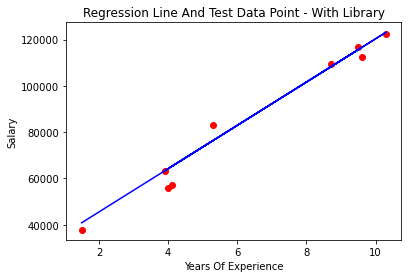

In [13]:
plt.plot(x_test,model.predict(x_test),color="blue")
plt.scatter(x_test,y_test,color="red")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Regression Line And Test Data Point - With Library")
plt.show()

In [14]:
model.coef_

array([[9360.26128619]])

In [15]:
model.intercept_

array([26777.3913412])

## Without Library

In [24]:
class simple_linear_regression:
    def __init__(self,learning_rate=0.001,epochs=1000):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.coef=[0] #m
        self.intercept=0 #c


    def fit(self,x,y):
            noofsamples = x.shape[0]
            for i in range(self.epochs):
                # Linear Equation : y = m*x + c
                y_pred = x*self.coef + self.intercept
                
                # gradient decent
                dcoef = (1/noofsamples)*np.dot(x.T,(y_pred-y))
                dintercept = (1/noofsamples)*np.sum(y_pred-y)
                
                self.coef -= self.learning_rate*dcoef
                self.intercept -= self.learning_rate*dintercept
            
            print(f'Coeficient : {self.coef[0][0]} | Intercept : {self.intercept}')
    
    def predict(self,x):
        y_pred = np.dot(x,self.coef)+self.intercept
        return y_pred

In [31]:
slr = simple_linear_regression()
slr.epochs = 30000

In [32]:
slr.fit(x_train,y_train)

Coeficient : 9367.503741683926 | Intercept : 26732.627061185984


In [33]:
slr.predict(x_test)

array([[ 40783.88267371],
       [123217.91560053],
       [ 65139.39240209],
       [ 63265.89165375],
       [115723.91260718],
       [108229.90961384],
       [116660.66298135],
       [ 64202.64202792],
       [ 76380.39689211]])

In [34]:
y_test

array([[ 37731],
       [122391],
       [ 57081],
       [ 63218],
       [116969],
       [109431],
       [112635],
       [ 55794],
       [ 83088]], dtype=int64)

In [35]:
# R2 score
from sklearn.metrics import r2_score
r2_score(slr.predict(x_test),y_test)

0.9711245757430509

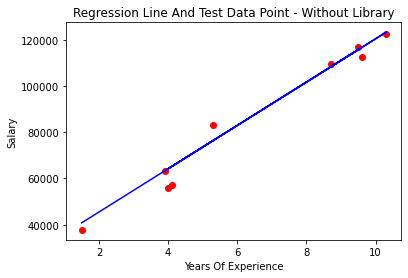

In [38]:
plt.plot(x_test,slr.predict(x_test),color="blue")
plt.scatter(x_test,y_test,color="red")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Regression Line And Test Data Point - Without Library")
plt.show()

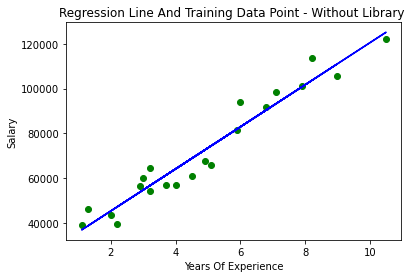

In [39]:
plt.plot(x_train,slr.predict(x_train),color="blue")
plt.scatter(x_train,y_train,color="green")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Regression Line And Training Data Point - Without Library ")
plt.show()